Notebook to show how (or not) we can iteratively use mzMine in a DSDA type framework

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/simon/git/pymzm') # needed for working with mzmine
sys.path.append('/Users/simon/git/vimms/')
sys.path.append('/Users/simon/git/molnet/code') # needed for load_mgf function
root_dir = '/Users/simon/git/vimms/DSDAWithDE/'

Grab some mzML files to test it out

In [2]:
import glob,os

In [3]:
input_folder = '/Users/simon/Dropbox/BioResearch/Meta_clustering/MS2LDA/multifile_ms2lda_manuscript/Supporting_Files/data/beers/'

In [4]:
input_file_list = glob.glob(os.path.join(input_folder,'Beer*_T10*.mzML'))
print(len(input_file_list))

20


Define an output folder for the various output files from mzmine

In [5]:
output_dir = os.path.join(root_dir,'output')

Pick the peaks from the first three files

In [6]:
from mzmine import pick_peaks
pick_peaks(input_file_list[:3],xml_template = 'QCB_mzmine_batch_ms2.xml',output_dir = output_dir,force = False)

Creating xml batch file for Beer_multibeers_5_T10_POS.mzML
Output exists for /Users/simon/Dropbox/BioResearch/Meta_clustering/MS2LDA/multifile_ms2lda_manuscript/Supporting_Files/data/beers/Beer_multibeers_5_T10_POS.mzML. Set force = True to overwrite
Creating xml batch file for Beer_multibeers_2_T10_POS.mzML
Output exists for /Users/simon/Dropbox/BioResearch/Meta_clustering/MS2LDA/multifile_ms2lda_manuscript/Supporting_Files/data/beers/Beer_multibeers_2_T10_POS.mzML. Set force = True to overwrite
Creating xml batch file for Beer_multibeers_19_T10_POS.mzML
Output exists for /Users/simon/Dropbox/BioResearch/Meta_clustering/MS2LDA/multifile_ms2lda_manuscript/Supporting_Files/data/beers/Beer_multibeers_19_T10_POS.mzML. Set force = True to overwrite


Try aligning through mzmine...

In [7]:
from mzmine import align
specific_files = ['/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_2_T10_POS_pp.mzTab', '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_5_T10_POS_pp.mzTab']
align(output_dir,xml_template = 'align_from_mztab.xml',specific_files = specific_files)

['/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_2_T10_POS_pp.mzTab', '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_5_T10_POS_pp.mzTab']


In [8]:
# load it all back in and match back
from mzmine import load_aligned_peaks,match_aligned_to_original
aligned_peaks,original_files,f_idx_dict = load_aligned_peaks(output_dir,
                                                             aligned_csv = 'pp_aligned.csv',
                                                             original_csv_suffix = '_quant')
matches = match_aligned_to_original(aligned_peaks,
                                    original_files,
                                    output_dir,
                                    f_idx_dict,
                                    write_file = False,
                                    original_csv_suffix = '_quant')

['/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_19_T10_POS_quant.csv', '/Users/simon/git/vimms/DSDAWithDE/output/align_quant.csv', '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_2_T10_POS_quant.csv', '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_5_T10_POS_quant.csv']
Beer_multibeers_19_T10_POS not in list, probably ok!
align not in list, probably ok!


Matches provides a way of linked the aligned peaks back to the originals in the files. This will allow us to, when we add an additional file to the alignment, match the new aligned peaks back to the previous aligned peaks...

First though, maybe we should check if we need this...if we give the aligner the files in the same order, plus the original file, does it produce a superset of the alignment...and are the IDs consistent...??

In [9]:
specific_files_extended = ['/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_2_T10_POS_pp.mzTab',
 '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_5_T10_POS_pp.mzTab',
 '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_19_T10_POS_pp.mzTab']
align(output_dir,xml_template = 'align_from_mztab.xml',
      specific_files = specific_files_extended,
      output_csv_name = 'pp_aligned_extended.csv')

['/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_2_T10_POS_pp.mzTab', '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_5_T10_POS_pp.mzTab', '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_19_T10_POS_pp.mzTab']


In [10]:
aligned_peaks_e,original_files_e,f_idx_dict_e = load_aligned_peaks(output_dir,
                                                                   aligned_csv = 'pp_aligned_extended.csv',
                                                                    original_csv_suffix = '_quant')

matches_e = match_aligned_to_original(aligned_peaks_e,
                                    original_files_e,
                                    output_dir,
                                    f_idx_dict_e,
                                    write_file = False,
                                    original_csv_suffix = '_quant')



['/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_19_T10_POS_quant.csv', '/Users/simon/git/vimms/DSDAWithDE/output/align_quant.csv', '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_2_T10_POS_quant.csv', '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_5_T10_POS_quant.csv']
align not in list, probably ok!


Following code shows that sometimes in the run they are correct (peak ID 1 is the same thing in both outputs) but sometimes not.

In [11]:
for i,a in enumerate(aligned_peaks):
    print(aligned_peaks[i][0],aligned_peaks[i][3],aligned_peaks_e[i][0],aligned_peaks_e[i][3])

1 (64140686.95029372, 0.0) 1 (64140686.95029372, 0.0, 0.0)
2 (119891159.371975, 0.0) 2 (119891159.371975, 0.0, 0.0)
3 (76070022.36164999, 69358485.6233625) 3 (76070022.36164999, 0.0, 69358485.6233625)
4 (25289826.500068754, 0.0) 4 (25289826.500068754, 0.0, 0.0)
5 (24178802.153828125, 0.0) 5 (24178802.153828125, 0.0, 0.0)
6 (11818682.793229684, 9050144.883570312) 6 (11818682.793229684, 11668824.383811718, 9050144.883570312)
7 (13090210.388834381, 0.0) 7 (13090210.388834381, 0.0, 0.0)
8 (10051701.34319062, 797261.9880000491) 8 (10051701.34319062, 6772234.781311718, 797261.9880000491)
9 (9709668.515231248, 6077966.687673437) 9 (9709668.515231248, 8870138.032746095, 6077966.687673437)
10 (9326371.818366405, 0.0) 10 (9326371.818366405, 26855223.673953123, 0.0)
11 (7709906.670214844, 0.0) 11 (7709906.670214844, 0.0, 0.0)
12 (6165800.291835936, 4245117.156361329) 12 (6165800.291835936, 4120160.521553907, 4245117.156361329)
13 (6443933.411259376, 0.0) 13 (6443933.411259376, 0.0, 0.0)
14 (63007

## Summary

- Code above aligns two files and then three
- It seems that the order in which it aligns files is *not* necessarily the order in which they are provided in the batch file
- This means that we cannot use it (at least not neatly)


Alternative is to implement our own version of the join algorithm...

- This is done below
- We can iteratively add csv files to the alignment
- Works (I think) exactly the same as the mzMine version
- (In this example, identical numbers of peaks)

In [12]:
from alignment import JoinAligner
j = JoinAligner(rt_tolerance = 0.5)
csv_list = ['output/Beer_multibeers_2_T10_POS_quant.csv',
            'output/Beer_multibeers_5_T10_POS_quant.csv',
            'output/Beer_multibeers_19_T10_POS_quant.csv']
j.add_file(csv_list[0])
print(len(j.peaksets))
j.add_file(csv_list[1])
print(len(j.peaksets))
j.add_file(csv_list[2])
print(len(j.peaksets))

269
443
559


Compare with the number of peaks we got with the mzMine version

In [13]:
print(len(aligned_peaks_e))
print(len(aligned_peaks))

559
443


The join aligner object has a method to povide a matrix - useful to do the DE analysis...

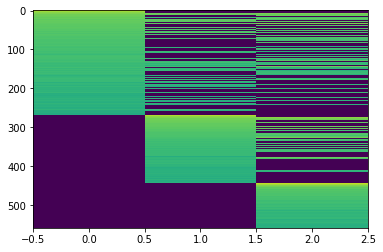

In [14]:
import pylab as plt
%matplotlib inline
import numpy as np
plt.imshow(np.log(j.to_matrix()+1),aspect='auto')

It's also easy to work out which aligned peaks have been fragmented...

- Load the mgf files (produced by mzmine)
- Go through the aligned peaksets and for each individual peak, see if it has a spectrum
- If it does, add it to the object
- The Peakset object can then be used to get ms2 from its child peaks
- If there are more than one, it takes the one with the highest total ms2 intensity

In [16]:
from mnet_utilities import load_mgf
mgf_files = glob.glob(os.path.join(output_dir,'*.mgf'))
spec_data = {}
for m in mgf_files:
    short_name = m.split(os.sep)[-1].split('.')[0]
    spec_data[short_name] = load_mgf(m)

In [17]:
def add_spec_to_peaks(aligner,spec_data):
    for peakset in aligner.peaksets:
        for peak in peakset.peaks:
            peak_file = peak.source_file
            peak_id = peak.source_id
            spec = spec_data[peak_file].get(peak_id,None)
            if not peak is None:
                peak.ms2_spectrum = spec

add_spec_to_peaks(j,spec_data)

In [18]:
for p in j.peaksets:
    print(p.get_ms2())

Spectrum from scan 17 in /Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_2_T10_POS.mgf with 5 peaks, max_ms2_intensity 370000.0
Spectrum from scan 45 in /Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_2_T10_POS.mgf with 7 peaks, max_ms2_intensity 950000.0
Spectrum from scan 273 in /Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_5_T10_POS.mgf with 42 peaks, max_ms2_intensity 38000.0
None
Spectrum from scan 69 in /Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_2_T10_POS.mgf with 23 peaks, max_ms2_intensity 49000.0
Spectrum from scan 239 in /Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_5_T10_POS.mgf with 5 peaks, max_ms2_intensity 49000.0
Spectrum from scan 44 in /Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_2_T10_POS.mgf with 7 peaks, max_ms2_intensity 79000.0
Spectrum from scan 99 in /Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_19_T10_POS.mgf with 11 peaks, max_ms2_intensity 6900.0
Spectrum from scan 99 in /Users/simo

Example code to create the total box for each peakset

In [29]:
# get the box files
import csv
box_files = glob.glob(os.path.join(output_dir,'*_box.csv'))
print(box_files)
boxes = {}
for box_file in box_files:
    short_name = box_file.split(os.sep)[-1].split('_box')[0]
    print(short_name)
    boxes[short_name] = {}
    with open(box_file,'r') as f:
        reader = csv.reader(f)
        heads = next(reader)
        for line in reader:
            peak_id = int(line[0])
            mz = float(line[1])
            rt = float(line[2])
            min_rt = float(line[3])
            max_rt = float(line[4])
            min_mz = float(line[5])
            max_mz = float(line[6])
            boxes[short_name][peak_id] = {'min_mz':min_mz,'max_mz':max_mz,'min_rt':min_rt,'max_rt':max_rt}

['/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_19_T10_POS_box.csv', '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_2_T10_POS_box.csv', '/Users/simon/git/vimms/DSDAWithDE/output/Beer_multibeers_5_T10_POS_box.csv']
Beer_multibeers_19_T10_POS
Beer_multibeers_2_T10_POS
Beer_multibeers_5_T10_POS


In [30]:
peakset_boxes = {}
for peakset in j.peaksets:
    min_mz = 1e6
    max_mz = -1e6
    min_rt = 1e6
    max_rt = -1e6
    for peak in peakset.peaks:
        box = boxes[peak.source_file][peak.source_id]
        min_mz = min(min_mz,box['min_mz'])
        max_mz = max(max_mz,box['max_mz'])
        min_rt = min(min_rt,box['min_rt'])
        max_rt = max(max_rt,box['max_rt'])
    peakset_boxes[peakset] = {'min_mz':min_mz,'max_mz':max_mz,'min_rt':min_rt,'max_rt':max_rt}



With something like the above, it is possible to define a _box_ for each peakset which can then be checked against ms1 info coming in scans from the MS.